# 2017 Earthquakes in Spain and Canary Islands

## Importing the libraries

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

## Reading the dataset

In [4]:
df=pd.read_csv('./data/catalogoComunSV_1517429848856.csv', sep=';')

IOError: File ./data/catalogoComunSV_1517429848856.csv does not exist

## Formatting the data

In [ ]:
df.shape

Comprobamos que no haya nulos

In [ ]:
df.notnull().sum()

In [ ]:
df.head(5)

In [ ]:
df.dtypes

In [ ]:
df.columns=['Event', 'Date', 'Hour', 'Latitud', 'Longitud', 'Depth_Km', 'Intensity', 'Mag', 'Mag_Type', 'Location']

In [ ]:
df.head()

Convertimos las fechas de tipo objet a datetime

In [9]:
df['Date']=pd.to_datetime(df['Date'])

Convertimos las profundidades a valores numéricos

In [10]:
df['Depth_Km']=pd.to_numeric(df['Depth_Km'],errors='coerce')

Sustituimos los valores NaN por ceros

In [11]:
df['Depth_Km']=df['Depth_Km'].fillna(0)

In [12]:
df.head()

,Event,Date,Hour,Latitud,Longitud,Depth_Km,Intensity,Mag,Mag_Type,Location
0,es2018aadac,2018-01-01,06:31:39,36.6794,-7.1540,18.0,,1.8,4,GOLFO DE CÁDIZ
1,es2018aadpa,2018-01-01,08:32:32,36.7112,-10.5884,30.0,,3.1,4,SW CABO DE SAN VICENTE
2,es2018aaefo,2018-01-01,09:28:16,28.7288,-17.8724,9.0,,1.9,4,E EL PUEBLO.ILP
3,es2018aaeln,2018-01-01,10:16:23,36.9762,-8.3869,20.0,,2.1,4,GOLFO DE CÁDIZ
4,es2018aahkg,2018-01-01,16:35:14,35.2819,-3.9848,0.0,,2.1,4,NW ALHUCEMAS.MAC


# Mapping the data

In [13]:
lons=list(df['Longitud'])
lats=list(df['Latitud'])

In [14]:
_GEOCODE_QUERY_URL = 'http://maps.googleapis.com/maps/api/geocode/json'
def geocode(address, sensor='false'):
    """
    Given a string 'address', return a dictionary of information about
    that location, including its latitude and longitude.
    """
    params = dict(address=address, sensor=sensor)
    response = requests.get(url=_GEOCODE_QUERY_URL, params=params)
    return response.json()
def address_to_latlng(address):
    """
    Given a string 'address', return a '(latitude, longitude)' pair.
    """
    location = geocode(address)['results'][0]['geometry']['location']
    return tuple(location.values())

/home/dsc/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/dsc/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/dsc/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/dsc/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


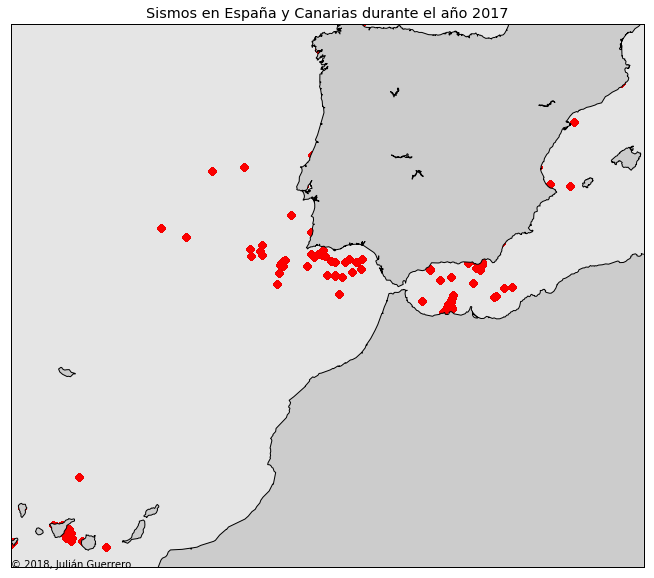

In [17]:
f, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Sismos en España y Canarias durante el año 2017')

map = Basemap(llcrnrlon=-18,llcrnrlat=27,urcrnrlon=4,urcrnrlat=43.5,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)


map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()

maximum = df['Mag'].max()
minimum = df['Mag'].min()


x, y = map(lons, lats)

for i in range(df['Mag'].count()):
    radio= 3 + (df['Mag'].iloc[i]-minimum)/(maximum-minimum)*17
    map.scatter(x, y, marker='D',color='r', alpha=0.3)
    
ax.annotate(u'\N{COPYRIGHT SIGN} 2018, Julián Guerrero', (0, 0))
f.savefig('./images/earthquakes_2017.png', dpi=72, transparent=False, bbox_inches='tight')

plt.show()